In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [4]:
np.random.seed(101)

In [5]:
centroid = [[3,2], [1,-1], [-1,2]]

In [8]:
#Retrun 값을 받긴 하는데 안 쓸경우 _언더바를 사용. 이건 테크닉임
X, _ = make_blobs(n_samples=1500, centers=centroid)
X.shape

(1500, 2)

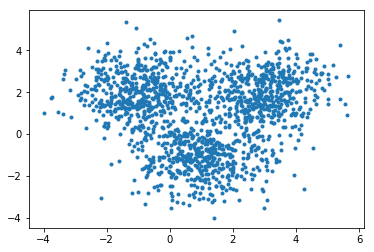

In [10]:
plt.scatter(X[:,0], X[:,1], marker='.')

In [11]:
k_means = KMeans(n_clusters=3)

In [15]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
set(k_means.labels_)

{0, 1, 2}

In [17]:
np.unique(k_means.labels_)

array([0, 1, 2])

In [18]:
k_means.cluster_centers_

array([[ 2.99916109,  1.99581145],
       [-0.97093792,  2.06738474],
       [ 0.96091829, -1.15966964]])

In [19]:
k_means.labels_ == 0

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, 'Kmeans algorithm')

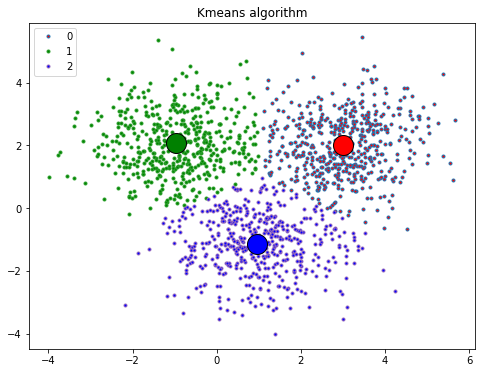

In [28]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

for k, col in zip(range(3), ['r','g','b']):
    my_member = (k_means.labels_ == k)
    cluster_center = k_means.cluster_centers_[k]
    
    ax.plot(X[my_member,0], X[my_member, 1], '.', markerfacecolor = col, label=k)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markersize=20, markerfacecolor = col, markeredgecolor = 'k')

plt.legend()
plt.title('Kmeans algorithm')

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
epsllon = 0.3
minsamples = 7

db = DBSCAN(eps=epsllon, min_samples=minsamples)

db.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=7, n_jobs=None, p=None)

In [31]:
set(db.labels_)

{-1, 0, 1, 2}

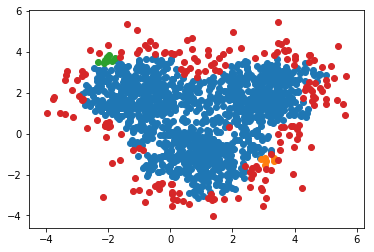

In [40]:
for k in set(db.labels_):
    my_members = (db.labels_ == k)
    plt.scatter(X[my_members,0], X[my_members, 1])

# 실습 - Iris dataset 을 이용한 KMeans Clustering

In [42]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()

X = iris.data

In [44]:
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
# your code below
nclusters=3

k_means_iris = KMeans(n_clusters=nclusters)
k_means_iris.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
set(k_means_iris.labels_)

{0, 1, 2}

In [56]:
k_means_iris.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Text(0, 0.5, 'sepal width')

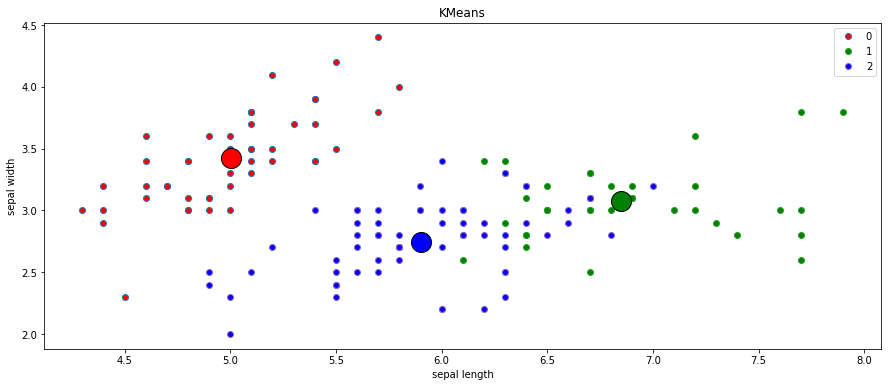

In [65]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)

for k, col in zip(range(nclusters), ['r','g','b']):
    my_member = (k_means_iris.labels_ == k)
    cluster_center = k_means_iris.cluster_centers_[k]
    
    ax.plot(X[my_member,0], X[my_member, 1], 'o', markerfacecolor = col, label=k)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markersize=20, markerfacecolor = col, markeredgecolor = 'k')

plt.legend()
ax.set_title('KMeans')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')